In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('customers.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# drop channel and reagion because those are categories, not numeric values
df.drop(columns=(['Channel', 'Region']), inplace=True)

In [8]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [9]:
# select features to cluster
df1 = df[['Fresh', 'Frozen', 'Delicassen']]

In [10]:
df1.head()

,Fresh,Frozen,Delicassen
0,12669,214,1338
1,7057,1762,1776
2,6353,2405,7844
3,13265,6404,1788
4,22615,3915,5185


In [11]:
# turn into np.array, dtype float to normalize and scale
np_array = df1.values.astype('float32')

In [12]:
np_array[0:11]

array([[12669.,   214.,  1338.],
       [ 7057.,  1762.,  1776.],
       [ 6353.,  2405.,  7844.],
       [13265.,  6404.,  1788.],
       [22615.,  3915.,  5185.],
       [ 9413.,   666.,  1451.],
       [12126.,   480.,   545.],
       [ 7579.,  1669.,  2566.],
       [ 5963.,   425.,   750.],
       [ 6006.,  1159.,  2098.],
       [ 3366.,  4400.,  1744.]], dtype=float32)

In [13]:
# now that features are np array, ready to normalize and scale
scaler = StandardScaler().fit(np_array)
np_array = scaler.transform(np_array)
np_array[0:11]

array([[ 0.05293319, -0.58936715, -0.06633906],
       [-0.391302  , -0.27013618,  0.08915105],
       [-0.44702926, -0.13753572,  2.2432926 ],
       [ 0.1001114 ,  0.6871443 ,  0.09341106],
       [ 0.84023947,  0.17385884,  1.2993469 ],
       [-0.20480551, -0.49615502, -0.02622403],
       [ 0.00995035, -0.5345122 , -0.34785426],
       [-0.34998146, -0.28931478,  0.36960125],
       [-0.47790092, -0.54585445, -0.27507922],
       [-0.4744971 , -0.39448777,  0.20346113],
       [-0.6834745 ,  0.2738763 ,  0.07779104]], dtype=float32)

In [14]:
# now that data is scaled, ready to cluster using dbscan
dbscan = DBSCAN(eps=.5, min_samples=25).fit(np_array)

In [16]:
# create var holding columns and scaled columns
columns = list(df1.columns)
scaled_columns = ["Scaled " + column for column in columns]

In [17]:
# make copy of original df
org_df1 = df1.copy()

In [18]:
# make a new scaled data frame to cluster with
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

In [20]:
scaled_df.head()

,Scaled Fresh,Scaled Frozen,Scaled Delicassen
0,0.052933,-0.589367,-0.066339
1,-0.391302,-0.270136,0.089151
2,-0.447029,-0.137536,2.243293
3,0.100111,0.687144,0.093411
4,0.840239,0.173859,1.299347


In [22]:
# merge the scaled and unscaled df together
df1 = df1.merge(scaled_df, on=df1.index)

In [23]:
df1.head()

,key_0,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen
0,0,12669,214,1338,0.052933,-0.589367,-0.066339
1,1,7057,1762,1776,-0.391302,-0.270136,0.089151
2,2,6353,2405,7844,-0.447029,-0.137536,2.243293
3,3,13265,6404,1788,0.100111,0.687144,0.093411
4,4,22615,3915,5185,0.840239,0.173859,1.299347


In [26]:
# drop key_0, not necessary 
df1.drop(columns=['key_0'], inplace=True)

In [27]:
df1.head()

,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen
0,12669,214,1338,0.052933,-0.589367,-0.066339
1,7057,1762,1776,-0.391302,-0.270136,0.089151
2,6353,2405,7844,-0.447029,-0.137536,2.243293
3,13265,6404,1788,0.100111,0.687144,0.093411
4,22615,3915,5185,0.840239,0.173859,1.299347


In [29]:
# extract labels
labels = dbscan.labels_
labels[0:11]

array([ 0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0])

In [31]:
df1['labels'] = labels

In [32]:
df1.head()

,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen,labels
0,12669,214,1338,0.052933,-0.589367,-0.066339,0
1,7057,1762,1776,-0.391302,-0.270136,0.089151,0
2,6353,2405,7844,-0.447029,-0.137536,2.243293,-1
3,13265,6404,1788,0.100111,0.687144,0.093411,-1
4,22615,3915,5185,0.840239,0.173859,1.299347,-1


In [33]:
# there are a lot of anomalies to look at potentially
df1.labels.value_counts()

 0    341
-1     99
Name: labels, dtype: int64

In [34]:
df1[df1.labels==-1]

,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen,labels
2,6353,2405,7844,-0.447029,-0.137536,2.243293,-1
3,13265,6404,1788,0.100111,0.687144,0.093411,-1
4,22615,3915,5185,0.840239,0.173859,1.299347,-1
12,31714,287,2931,1.560499,-0.574313,0.499176,-1
17,5876,839,4478,-0.484788,-0.460479,1.048362,-1
22,31276,9408,4334,1.525828,1.306634,0.997242,-1
23,26373,5154,16523,1.137716,0.429367,5.324340,-1
24,22647,2915,5778,0.842773,-0.032363,1.509862,-1
28,4113,1158,5206,-0.624343,-0.394694,1.306802,-1
29,43088,1200,823,2.460843,-0.386033,-0.249164,-1


In [35]:
# whole df
df1.describe()

,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen,labels
count,440.000000,440.000000,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,440.000000
mean,12000.297727,3071.931818,1524.870455,1.422384e-08,-1.097267e-08,-1.991337e-08,-0.225000
std,12647.328865,4854.673333,2820.105937,1.001138e+00,1.001138e+00,1.001138e+00,0.418058
min,3.000000,25.000000,3.000000,-9.496831e-01,-6.283430e-01,-5.402644e-01,-1.000000
25%,3127.750000,742.250000,408.250000,-7.023339e-01,-4.804306e-01,-3.964005e-01,0.000000
50%,8504.000000,1526.000000,965.500000,-2.767602e-01,-3.188045e-01,-1.985767e-01,0.000000
75%,16933.750000,3554.250000,1820.250000,3.905226e-01,9.946441e-02,1.048598e-01,0.000000
max,112151.000000,60869.000000,47943.000000,7.927738e+00,1.191900e+01,1.647845e+01,0.000000


In [39]:
# inliers
df1[df1.labels==0].describe()

,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen,labels
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0
mean,8265.090909,1695.785924,986.794721,-0.295672,-0.283791,-0.191017,0.0
std,6793.988331,1548.175768,794.138560,0.537799,0.319267,0.281919,0.0
min,3.000000,25.000000,3.000000,-0.949683,-0.628343,-0.540264,0.0
25%,2708.000000,575.000000,373.000000,-0.735560,-0.514921,-0.408914,0.0
50%,6758.000000,1152.000000,750.000000,-0.414970,-0.395931,-0.275079,0.0
75%,12212.000000,2369.000000,1426.000000,0.016758,-0.144960,-0.035099,0.0
max,27380.000000,7530.000000,3637.000000,1.217428,0.919350,0.749807,0.0


In [40]:
# outliers
df1[df1.labels==-1].describe()

,Fresh,Frozen,Delicassen,Scaled Fresh,Scaled Frozen,Scaled Delicassen,labels
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,24866.010101,7811.989899,3378.242424,1.018425,0.977502,0.657948,-1.0
std,18456.157734,8244.499776,5381.516811,1.460954,1.700194,1.910440,0.0
min,3.000000,42.000000,3.000000,-0.949683,-0.624837,-0.540264,-1.0
25%,10392.000000,3003.500000,1100.000000,-0.127310,-0.014112,-0.150829,-1.0
50%,22647.000000,6386.000000,2204.000000,0.842773,0.683432,0.241091,-1.0
75%,35198.000000,9659.500000,4349.500000,1.836286,1.358499,1.002744,-1.0
max,112151.000000,60869.000000,47943.000000,7.927738,11.919002,16.478447,-1.0


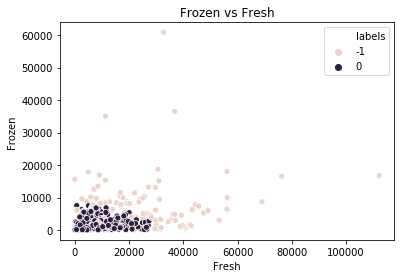

In [51]:
sns.scatterplot(df1.Fresh, df1.Frozen, hue=df1.labels)
plt.title("Frozen vs Fresh")
plt.show()

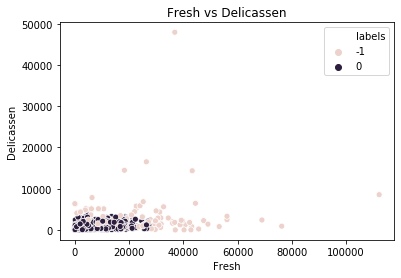

In [50]:
sns.scatterplot(df1.Fresh, df1.Delicassen, hue=df1.labels)
plt.title("Fresh vs Delicassen")
plt.show()

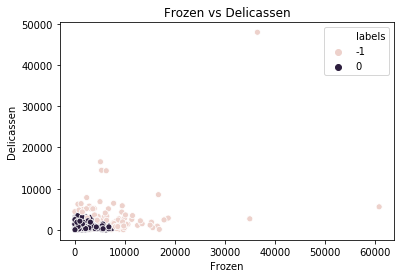

In [49]:
sns.scatterplot(df1.Frozen, df1.Delicassen, hue=df1.labels)
plt.title("Frozen vs Delicassen")
plt.show()